Default n_estimators=10 accuracy: 1.0000
Best accuracy: 1.0000 with n_estimators=1


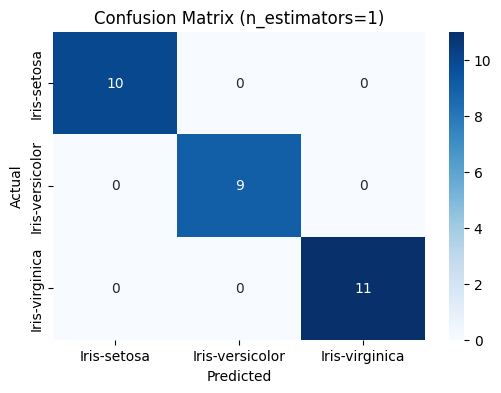

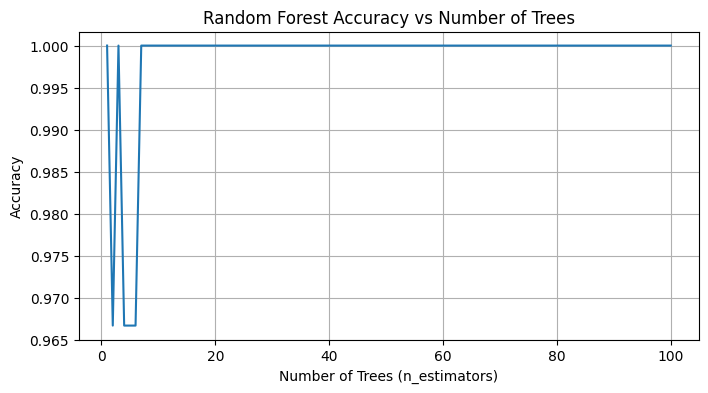

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("iris.csv")  # Use the correct path if needed

# Prepare data
X = df.iloc[:, :-1]  # All features
y = df.iloc[:, -1]   # Class label

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Default model with n_estimators = 10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default n_estimators=10 accuracy: {default_score:.4f}")

# 2. Tune number of trees
best_score = 0
best_n = 0
best_model = None
scores = []

for n in range(1, 101):  # Try from 1 to 100 trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
        best_model = rf

print(f"Best accuracy: {best_score:.4f} with n_estimators={best_n}")

# Confusion matrix for best model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix (n_estimators={best_n})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), scores)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid(True)
print()
plt.show()
